![Flower Petal and sepal](./iris.jpg)

<sub>Icons by [Vecteezy](https://www.vecteezy.com/vector-art/49389366-anatomy-of-a-flower-exploring-petals-sepals-stamens-and-pistil)</sub>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
df=pd.read_csv("./iris.csv")
display(df.head(), df.describe(include='all'), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


None

([<matplotlib.patches.Wedge at 0x2a85c3083b0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

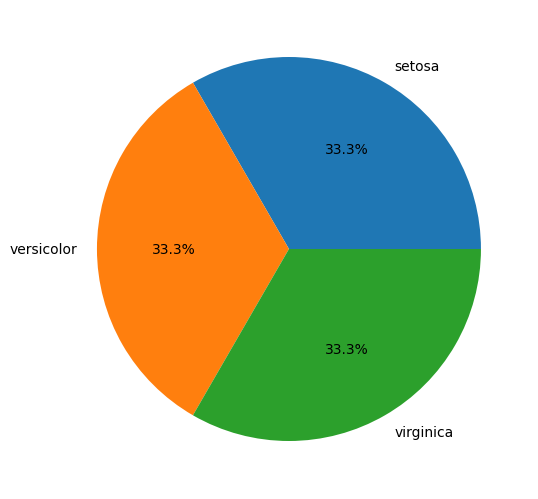

In [3]:
pie_sizes = df['species'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(pie_sizes, labels=pie_sizes.index, autopct='%1.1f%%')

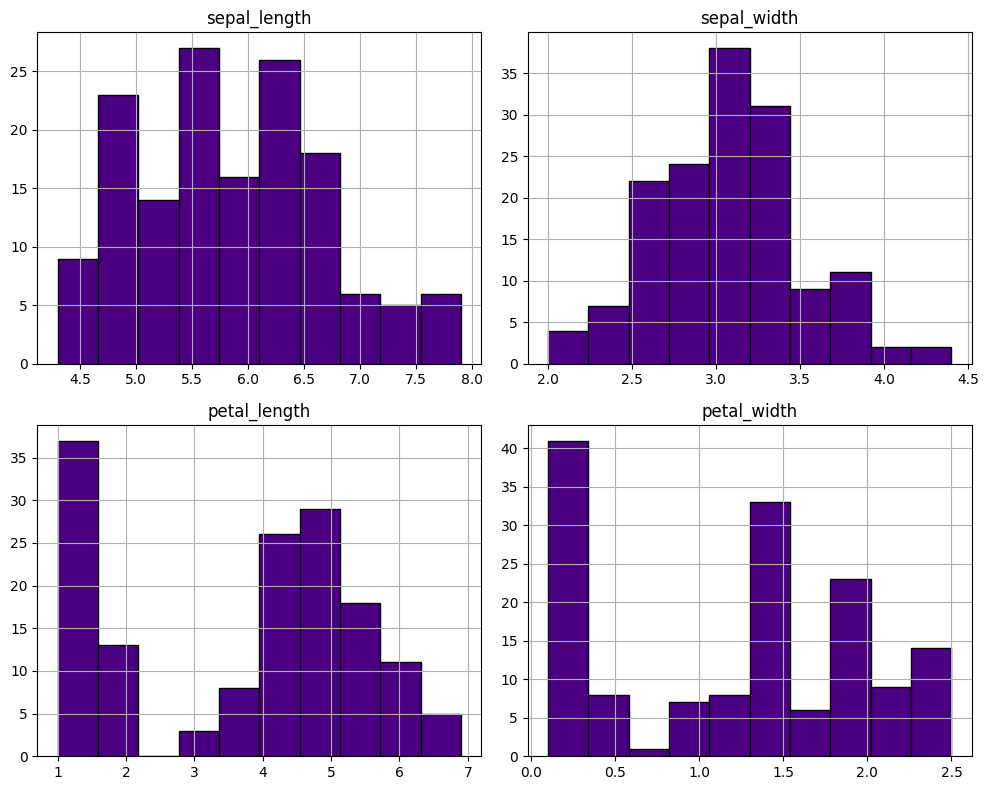

In [4]:
df.hist(figsize=(10,8), color='indigo', edgecolor='black')
plt.tight_layout()

In [5]:
corr=df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


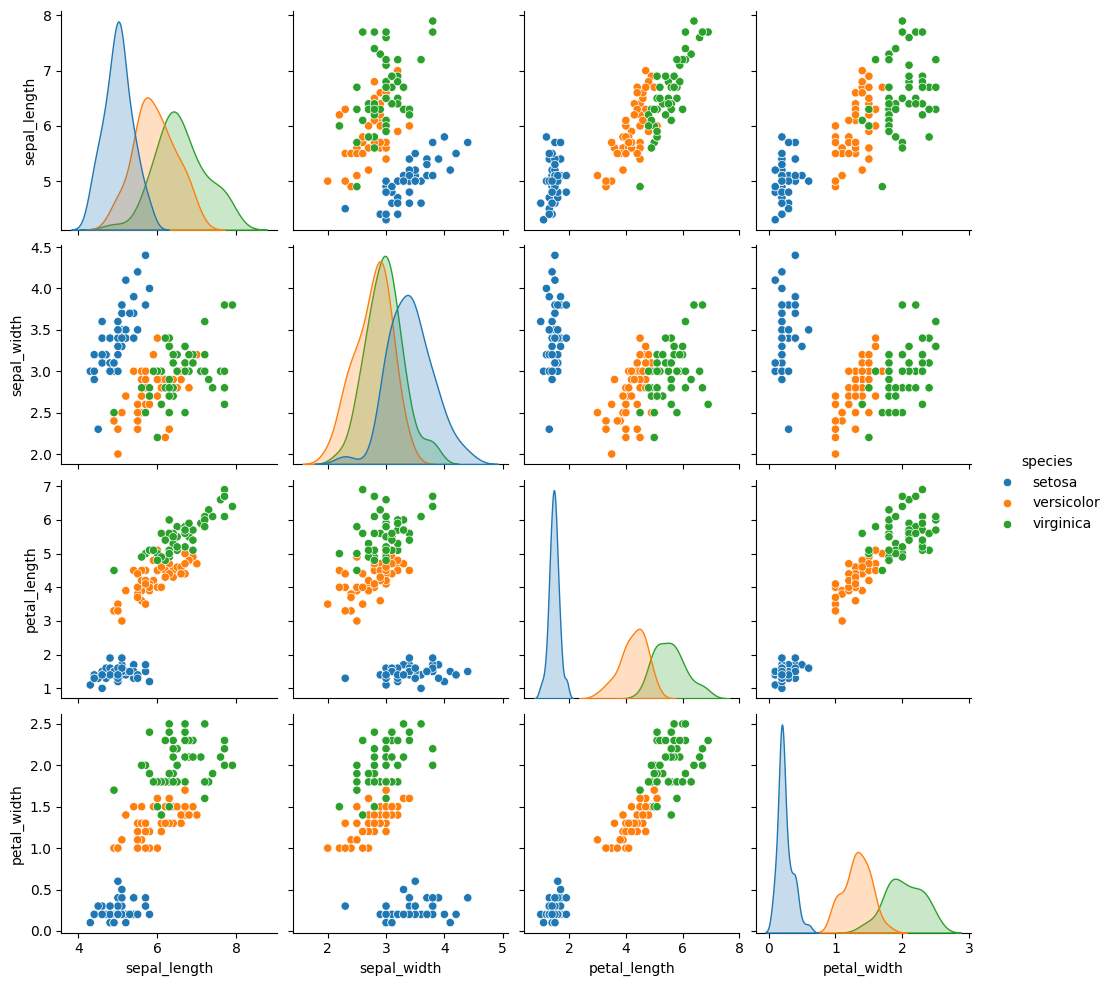

In [6]:
sns.pairplot(df, hue="species")

Logistic regression: supervised

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X, y = df.drop('species', axis=1), df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test, prediction))
print(metrics.classification_report(y_test, prediction))


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Find clusters: unsupervised

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


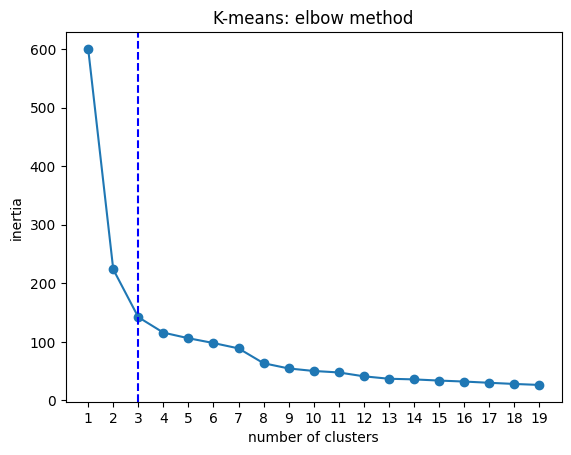

In [8]:
# Find clusters: unsupervised
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
#recap: display only X, without target labels, hence "unsupervised"
display(X.head())
# ensure all features are on the same scale (mean=0, std=1), so that distance calculations are meaningful
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
_list = []
_range = range(1,20)
# test different number of clusters and record the inertia for each
for k in _range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    # expect that inertia will decrease as number of clusters increases, because points are closer to their assigned cluster center
    _list.append(kmeans.inertia_) # inertia : sum of squared distances from each point to its assigned cluster center
#find the "elbow" point where inertia starts decreasing more slowly, indicating optimal number of clusters
k1=KneeLocator(_range, _list , curve='convex', direction= 'decreasing')
_optimal_n_clusters = k1.elbow

# looking for the "elbow" point where inertia starts decreasing more slowly, indicating optimal number of clusters    
plt.plot(_range, _list, marker='o')
plt.title('K-means: elbow method')
plt.xticks(_range)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.axvline(x=_optimal_n_clusters, color='b', label= 'axvline-full height', ls= '--')
plt.show()

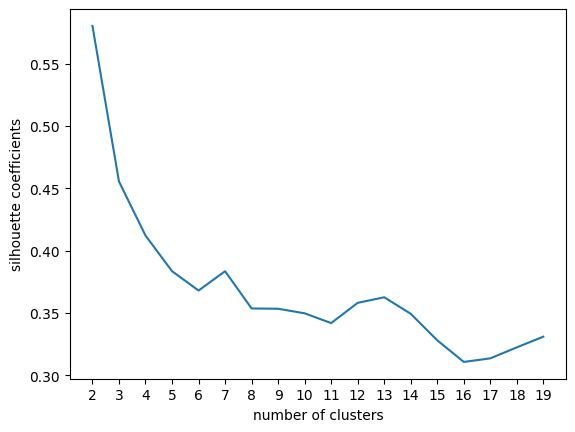

In [9]:
# remove 1 from range to avoid silhouette score error (undefined for k=1)
__range = _range[1:]
# silhouette coefficient measures how similar an object is to its own cluster compared to other clusters
# higher silhouette score indicates better-defined clusters
silhouette_coefficients =[]
for k in __range:
    kmeans=KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    score= metrics.silhouette_score(X_scaled, kmeans.labels_, random_state=1)
    silhouette_coefficients.append(score)

plt.plot(__range,silhouette_coefficients)
plt.xticks(__range)
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.show()    

array([[-0.16840578, -0.97008147,  0.25962078,  0.17609756],
       [-1.00206653,  0.89510445, -1.30297509, -1.25663117],
       [ 1.03359865,  0.01388418,  0.94369497,  0.97226253]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2])

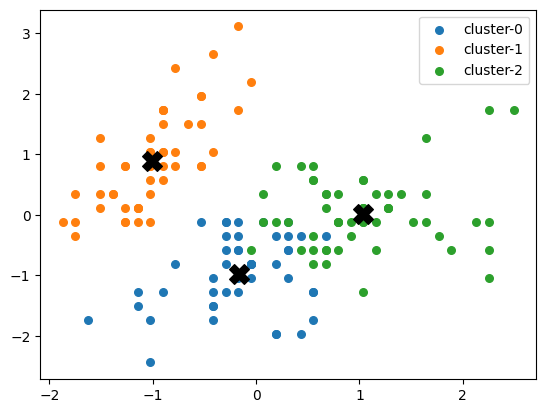

In [10]:
kmeans= KMeans(n_clusters=_optimal_n_clusters, random_state=1)
#assign each data point to a cluster
y_kmeans= kmeans.fit_predict(X_scaled) #compute cluster centers and predict cluster index for each sample
centroids= kmeans.cluster_centers_
cluster = kmeans.labels_
display(centroids, cluster)
#visualising the clusters
for i in range(_optimal_n_clusters):
    #display(X[y_kmeans == i].head())
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s = 30, label = f'cluster-{i}')

#plotting the centroid of the clusters
plt.scatter(centroids[:,0], centroids[:,1],c='black', s=200, marker='X')
plt.legend()
plt.show()

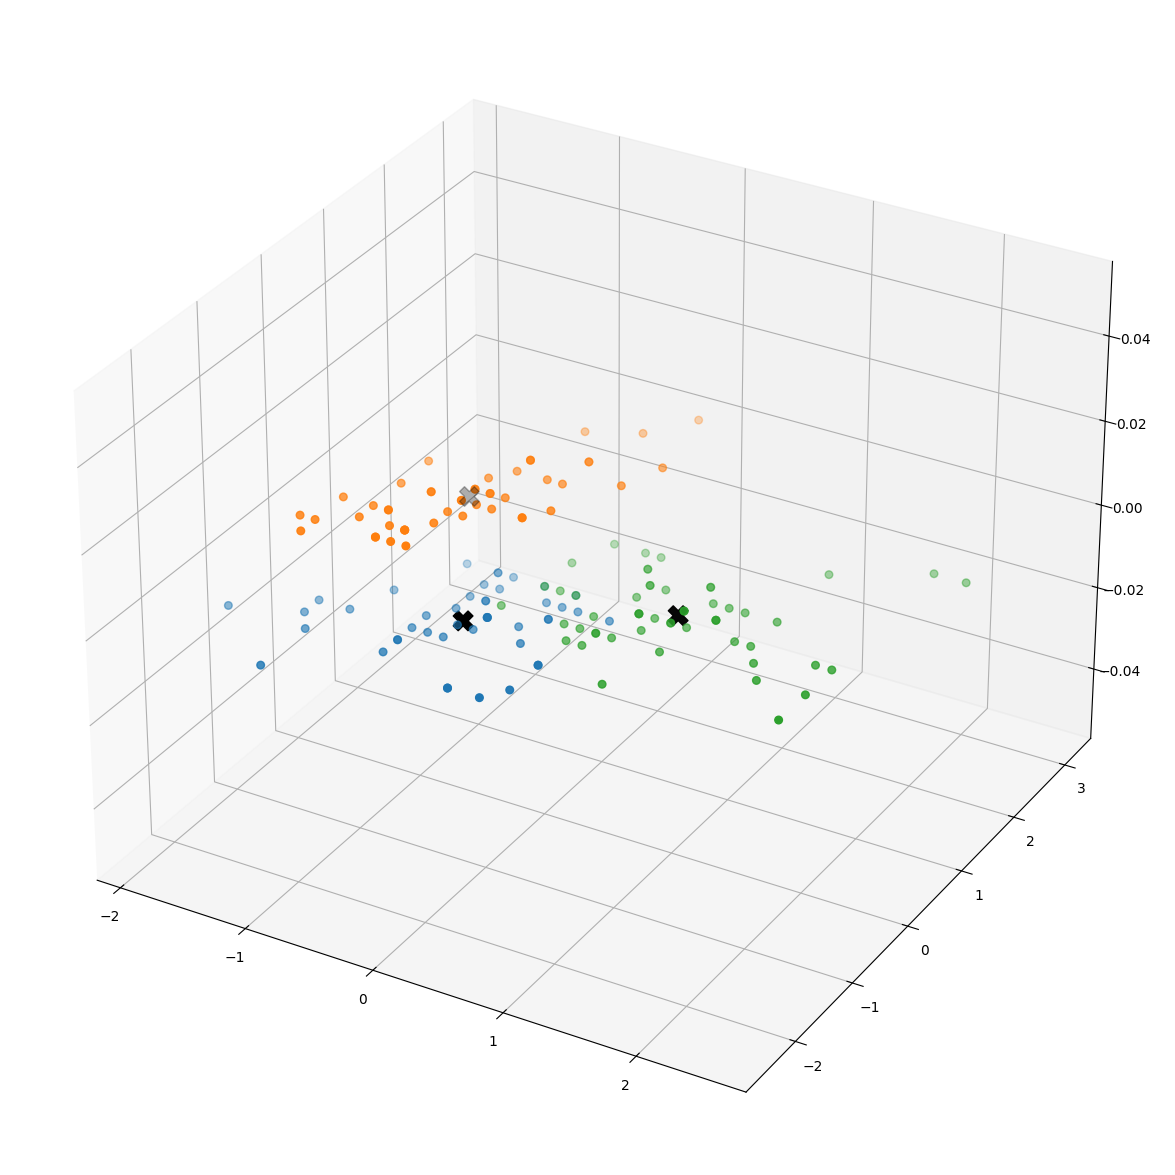

In [11]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
for i in range(_optimal_n_clusters):
    ax.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s = 30, label = f'cluster-{i}')
ax.scatter(centroids[:,0], centroids[:,1],c='black', s=200, marker='X')
plt.show()